#**0. 라이브러리 및 다운로드**

# Library & Download


---



In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,315 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155222 files and d

In [ ]:
!pip install squarify
!pip install fake-useragent
!pip install selenium

  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=13502 sha256=c0cd258fbeaaf46dcda01116bcd2a4c1bbbfd9bcd3547961b04ca7ede01e0ffb
  Stored in directory: /root/.cache/pip/wheels/ed/f7/62/50ab6c9a0b5567267ab76a9daa9d06315704209b2c5d032031
Successfully built fake-useragent
     |████████████████████████████████| 958 kB 5.2 MB/s 
     |████████████████████████████████| 356 kB 46.6 MB/s 
     |████████████████████████████████| 138 kB 46.9 MB/s 
     |████████████████████████████████| 55 kB 3.0 MB/s 
     |████████████████████████████████| 3.6 MB 33.3 MB/s 
     |████████████████████████████████| 54 kB 2.7 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
import requests
from requests import get
from bs4 import BeautifulSoup
from selenium import webdriver
import time
from selenium.webdriver.common.keys import Keys
import pandas as pd
import numpy as np
from fake_useragent import UserAgent

from time import sleep
from random import randint

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [ ]:
ua = UserAgent(verify_ssl=False)
headers = {'User-Agent':ua.random}

Error occurred during loading data. Trying to use cache server https://fake-useragent.herokuapp.com/browsers/0.1.11
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/fake_useragent/utils.py", line 154, in load
    for item in get_browsers(verify_ssl=verify_ssl):
  File "/usr/local/lib/python3.7/dist-packages/fake_useragent/utils.py", line 99, in get_browsers
    html = html.split('<table class="w3-table-all notranslate">')[1]
IndexError: list index out of range


In [ ]:
# 코랩에서 셀레니움 사용할수 있게 도와주는 코드

!apt-get update # apt install을 정확히 실행하기 위해 ubuntu 업데이트 
!apt install chromium-chromedriver 
!cp /usr/lib/chromium-browser/chromedriver /usr/bin 
import sys 
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver') 
from selenium import webdriver 
chrome_options = webdriver.ChromeOptions() 
chrome_options.add_argument('--headless') 
chrome_options.add_argument('--no-sandbox') 
chrome_options.add_argument('--disable-dev-shm-usage') 
driver = webdriver.Chrome('chromedriver', chrome_options=chrome_options) 

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 http://security.ubuntu.com/ubuntu bionic-security/restricted amd64 Packages [691 kB]
Hit:12 http://ppa.launchpad.net

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: use options instead of chrome_options
  del sys.path[0]


#**1. 데이터 수집**

# Crawling


---



In [ ]:
# DP - 리뷰 데이터 불러오는 함수

def dp_replys(url,imp_time=5,delay_time=0.1):

  # 웹 드라이버
  driver = webdriver.Chrome('chromedriver', chrome_options=chrome_options) 
  driver.implicitly_wait(1)
  driver.get(url)

  # Load More 계속 클릭하기
  while True:
   try:
     load_more = driver.find_element_by_xpath('//*[@id="load-more-trigger"]')
     load_more.click()
     time.sleep(5)
   except:
     break
     
  html = driver.page_source

  # 모듈 참조
  from bs4 import BeautifulSoup
  soup = BeautifulSoup(html, 'html.parser')
  
  # 리뷰 추출
  contents = soup.select('div.content')
  contents = [content.text for content in contents]

  driver.quit()
  return contents

if __name__ == '__main__':
    from datetime import datetime
    start = datetime.now()

    url = 'https://www.imdb.com/title/tt13024974/reviews/?ref_=tt_ql_urv'
    dp_reply = dp_replys(url,5,0.1)

    import pandas as pd 
    DP = pd.DataFrame({
    "Movie Name" : "D.P",
    'review': dp_reply
})

    end = datetime.now()
    print(end-start)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: use options instead of chrome_options
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  del sys.path[0]


0:00:14.176868


In [ ]:
# SweetHome(스위트홈) - 리뷰 데이터 불러오는 함수

def sh_replys(url,imp_time=5,delay_time=0.1):

  # 웹 드라이버
  driver = webdriver.Chrome('chromedriver', chrome_options=chrome_options) 
  driver.implicitly_wait(1)
  driver.get(url)

  # Load More 계속 클릭하기
  while True:
   try:
     load_more = driver.find_element_by_xpath('//*[@id="load-more-trigger"]')
     load_more.click()
     time.sleep(5)
   except:
     break
     
  html = driver.page_source

  # 모듈 참조
  from bs4 import BeautifulSoup
  soup = BeautifulSoup(html, 'html.parser')
  
  # 리뷰 추출
  contents = soup.select('div.content')
  contents = [content.text for content in contents]

  driver.quit()
  return contents

if __name__ == '__main__':
    from datetime import datetime
    start = datetime.now()

    url = 'https://www.imdb.com/title/tt11612120/reviews/?ref_=tt_ql_urv'
    sh_reply = sh_replys(url,5,0.1)

    import pandas as pd 
    SweetHome = pd.DataFrame({
    "Movie Name" : "SweetHome",
    'review': sh_reply
})

    end = datetime.now()
    print(end-start)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: use options instead of chrome_options
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  del sys.path[0]


0:01:26.598378


In [ ]:
# Hellbound(지옥) - 리뷰 데이터 불러오는 함수

def hb_replys(url,imp_time=5,delay_time=0.1):

  # 웹 드라이버
  driver = webdriver.Chrome('chromedriver', chrome_options=chrome_options) 
  driver.implicitly_wait(1)
  driver.get(url)

  # Load More 계속 클릭하기
  while True:
   try:
     load_more = driver.find_element_by_xpath('//*[@id="load-more-trigger"]')
     load_more.click()
     time.sleep(5)
   except:
     break
     
  html = driver.page_source

  # 모듈 참조
  from bs4 import BeautifulSoup
  soup = BeautifulSoup(html, 'html.parser')
  
  # 리뷰 추출
  contents = soup.select('div.content')
  contents = [content.text for content in contents]

  driver.quit()
  return contents

if __name__ == '__main__':
    from datetime import datetime
    start = datetime.now()

    url = 'https://www.imdb.com/title/tt12235718/reviews/?ref_=tt_ql_urv'
    hb_reply = hb_replys(url,5,0.1)

    import pandas as pd 
    Hellbound = pd.DataFrame({
    "Movie Name" : "Hellbound",
    'review': hb_reply
})

    end = datetime.now()
    print(end-start)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: use options instead of chrome_options
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  del sys.path[0]


0:01:10.962571


In [ ]:
# Kingdom(킹덤) - 리뷰 데이터 불러오는 함수

def kd_replys(url,imp_time=5,delay_time=0.1):

  # 웹 드라이버
  driver = webdriver.Chrome('chromedriver', chrome_options=chrome_options) 
  driver.implicitly_wait(1)
  driver.get(url)

  # Load More 계속 클릭하기
  while True:
   try:
     load_more = driver.find_element_by_xpath('//*[@id="load-more-trigger"]')
     load_more.click()
     time.sleep(5)
   except:
     break
     
  html = driver.page_source

  # 모듈 참조
  from bs4 import BeautifulSoup
  soup = BeautifulSoup(html, 'html.parser')
  
  # 리뷰 추출
  contents = soup.select('div.content')
  contents = [content.text for content in contents]

  driver.quit()
  return contents

if __name__ == '__main__':
    from datetime import datetime
    start = datetime.now()

    url = 'https://www.imdb.com/title/tt6611916/reviews/?ref_=tt_ql_urv'
    kd_reply = kd_replys(url,5,0.1)

    import pandas as pd 
    Kingdom = pd.DataFrame({
    "Movie Name" : "Kingdom",
    'review': kd_reply
})

    end = datetime.now()
    print(end-start)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: use options instead of chrome_options
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  del sys.path[0]


0:01:58.115187


In [ ]:
# SquidGame(오징어게임) - 리뷰 데이터 불러오는 함수

def sg_replys(url,imp_time=5,delay_time=0.1):

  # 웹 드라이버
  driver = webdriver.Chrome('chromedriver', chrome_options=chrome_options) 
  driver.implicitly_wait(1)
  driver.get(url)

  # Load More 계속 클릭하기
  while True:
   try:
     load_more = driver.find_element_by_xpath('//*[@id="load-more-trigger"]')
     load_more.click()
     time.sleep(5)
   except:
     break
     
  html = driver.page_source

  # 모듈 참조
  from bs4 import BeautifulSoup
  soup = BeautifulSoup(html, 'html.parser')
  
  # 리뷰 추출
  contents = soup.select('div.content')
  contents = [content.text for content in contents]

  driver.quit()
  return contents

if __name__ == '__main__':
    from datetime import datetime
    start = datetime.now()

    url = 'https://www.imdb.com/title/tt10919420/reviews/?ref_=tt_ql_urv'
    sg_reply = sg_replys(url,5,0.1)

    import pandas as pd 
    SquidGame = pd.DataFrame({
    "Movie Name" : "SquidGame",
    'review': sg_reply
})

    end = datetime.now()
    print(end-start)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: use options instead of chrome_options
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  del sys.path[0]


0:08:46.581258


In [ ]:
# Binsenjo(빈센조) - 리뷰 데이터 불러오는 함수

def bsj_replys(url,imp_time=5,delay_time=0.1):

  # 웹 드라이버
  driver = webdriver.Chrome('chromedriver', chrome_options=chrome_options) 
  driver.implicitly_wait(1)
  driver.get(url)

  # Load More 계속 클릭하기
  while True:
   try:
     load_more = driver.find_element_by_xpath('//*[@id="load-more-trigger"]')
     load_more.click()
     time.sleep(5)
   except:
     break
     
  html = driver.page_source

  # 모듈 참조
  from bs4 import BeautifulSoup
  soup = BeautifulSoup(html, 'html.parser')
  
  # 리뷰 추출
  contents = soup.select('div.content')
  contents = [content.text for content in contents]

  driver.quit()
  return contents

if __name__ == '__main__':
    from datetime import datetime
    start = datetime.now()

    url = 'https://www.imdb.com/title/tt13433812/reviews/?ref_=tt_ql_urv'
    bsj_reply = bsj_replys(url,5,0.1)

    import pandas as pd 
    Binsenjo = pd.DataFrame({
    "Movie Name" : "Binsenjo",
    'review': bsj_reply
})

    end = datetime.now()
    print(end-start)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: use options instead of chrome_options
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  del sys.path[0]


0:01:05.972801


In [ ]:
# Bimilui Soop(비밀의 숲) - 리뷰 데이터 불러오는 함수

def bs_replys(url,imp_time=5,delay_time=0.1):

  # 웹 드라이버
  driver = webdriver.Chrome('chromedriver', chrome_options=chrome_options) 
  driver.implicitly_wait(1)
  driver.get(url)

  # Load More 계속 클릭하기
  while True:
   try:
     load_more = driver.find_element_by_xpath('//*[@id="load-more-trigger"]')
     load_more.click()
     time.sleep(5)
   except:
     break
     
  html = driver.page_source

  # 모듈 참조
  from bs4 import BeautifulSoup
  soup = BeautifulSoup(html, 'html.parser')
  
  # 리뷰 추출
  contents = soup.select('div.content')
  contents = [content.text for content in contents]

  driver.quit()
  return contents

if __name__ == '__main__':
    from datetime import datetime
    start = datetime.now()

    url = 'https://www.imdb.com/title/tt6461346/reviews/?ref_=tt_ql_urv'
    bs_reply = bs_replys(url,5,0.1)

    import pandas as pd 
    BimiluiSoop = pd.DataFrame({
    "Movie Name" : "BimiluiSoop",
    'review': bs_reply
})

    end = datetime.now()
    print(end-start)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: use options instead of chrome_options
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  del sys.path[0]


0:00:24.399107


In [ ]:
# Dokkaebi(도깨비) - 리뷰 데이터 불러오는 함수

def dkb_replys(url,imp_time=5,delay_time=0.1):

  # 웹 드라이버
  driver = webdriver.Chrome('chromedriver', chrome_options=chrome_options) 
  driver.implicitly_wait(1)
  driver.get(url)

  # Load More 계속 클릭하기
  while True:
   try:
     load_more = driver.find_element_by_xpath('//*[@id="load-more-trigger"]')
     load_more.click()
     time.sleep(5)
   except:
     break
     
  html = driver.page_source

  # 모듈 참조
  from bs4 import BeautifulSoup
  soup = BeautifulSoup(html, 'html.parser')
  
  # 리뷰 추출
  contents = soup.select('div.content')
  contents = [content.text for content in contents]

  driver.quit()
  return contents

if __name__ == '__main__':
    from datetime import datetime
    start = datetime.now()

    url = 'https://www.imdb.com/title/tt5994364/reviews/?ref_=tt_ql_urv'
    dkb_reply = dkb_replys(url,5,0.1)

    import pandas as pd 
    Dokkaebi = pd.DataFrame({
    "Movie Name" : "Dokkaebi",
    'review': dkb_reply
})

    end = datetime.now()
    print(end-start)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: use options instead of chrome_options
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  del sys.path[0]


0:00:40.522056


In [ ]:
# 데이터 합치기
df = pd.concat([DP, SweetHome, Hellbound, Kingdom, SquidGame, Binsenjo, BimiluiSoop, Dokkaebi])

# index 재정렬
df.reset_index(inplace=True, drop=True)

In [ ]:
print(df.shape)

(4381, 2)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4381 entries, 0 to 4380
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Movie Name  4381 non-null   object
 1   review      4381 non-null   object
dtypes: object(2)
memory usage: 68.6+ KB


In [ ]:
df.head()

Movie Name                                             review
0        D.P  \nThis show is primarily a scathing indictment...
1        D.P  \nKorean Drama "D. P." is an intense drama tha...
2        D.P  \nReview By Kamal KPretty good show, a little ...
3        D.P  \nFunny and sad=and more-shame only 6 eps pref...
4        D.P  \nA new recruit is assigned to the DP who are ...

In [ ]:
# 중복데이터 제거
df = df.drop_duplicates(['review'])
df.shape

(4381, 2)

#**2. 데이터 전처리**

# Data Cleansing & Pre-Processing
---
* 정규표현식
* 소문자 전환
* 불용어 제거
* 표제어 추출

In [ ]:
# 텍스트 전처리 함수

import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

stemmer = nltk.stem.PorterStemmer()
lanc_stemmer = LancasterStemmer()
stemmer = SnowballStemmer("english")
lemma = WordNetLemmatizer()


# 문장화
def clean_review(text):
    review_text = BeautifulSoup(text, "html.parser").get_text() # html태그 삭제
    tokens = re.sub("[^a-zA-Z]", " ", text) # 정규식 적용
    words = tokens.lower().split() # 소문자로 치환
    stops = set(stopwords.words("english")) # 불용어 제거
    meaningful_words = [w for w in words if not w in stops] 
    lemma_words = [lemma.lemmatize(w) for w in meaningful_words] # 표제어 추출
    return(" ".join(lemma_words))

# 단어화
def tokenize(text): 
    review_text = BeautifulSoup(text, "html.parser").get_text() # html태그 삭제
    tokens = re.sub("[^a-zA-Z]", " ", text) # 정규식 적용
    words = tokens.lower().split() # 소문자로 치환
    stops = set(stopwords.words("english")) # 불용어 제거
    meaningful_words = [w for w in words if not w in stops] 
    lemma_words = [lemma.lemmatize(w) for w in meaningful_words] # 표제어 추출
    # stemming_words = [stemmer.stem(w) for w in lemma_words] # 어간추출
    return lemma_words

In [ ]:
# 적용시간이 오래걸리는 문제로 인해 multiprocessing을 사용하여 함수를 적용시켜준다.
# multiprocessing을 사용하면 복잡하고 오래걸리는 작업을 별도의 프로세스를 생성 후
# 병렬처리해서 보다 빠른 응답처리 속도를 기대할 수 있는 장점이 있다.
# 출처: https://gist.github.com/yong27/7869662

from multiprocessing import Pool
import numpy as np

def _apply_df(args):
    df, func, kwargs = args
    return df.apply(func, **kwargs)

def apply_by_multiprocessing(df, func, **kwargs):
    # 키워드 항목 중 workers 파라미터를 꺼냄
    workers = kwargs.pop("workers")
    # 위에서 가져온 workers 수로 프로세스 풀을 정의
    pool = Pool(processes = workers)
    # 실행할 함수와 데이터프레임을 워커의 수 만큼 나눠서 작업
    result = pool.map(_apply_df, [(d, func, kwargs)
                                 for d in np.array_split(df, workers)])
    pool.close()
    #작업 결과를 합쳐서 반환
    return pd.concat(list(result))

In [ ]:
clean_reviews = apply_by_multiprocessing(df["review"],clean_review, workers = 4)
tokens = apply_by_multiprocessing(df["review"],tokenize, workers = 4)

# 같은 기능/다른 방법
# df['clean_reviews'] = df['review'].apply(clean_review)
# df['tokens'] = df['review'].apply(tokenize)

df['clean_reviews'] = clean_reviews
df['tokens'] = tokens
df.head()

Movie Name  ...                                             tokens
0        D.P  ...  [show, primarily, scathing, indictment, instit...
1        D.P  ...  [korean, drama, p, intense, drama, take, stren...
2        D.P  ...  [review, kamal, kpretty, good, show, little, s...
3        D.P  ...  [funny, sad, shame, eps, pref, eps, better, su...
4        D.P  ...  [new, recruit, assigned, dp, responsible, brin...

[5 rows x 4 columns]

#**3. 탐색적 자료분석**

# Exploratory Data Analysis (EDA)
---
* VADER 감정분석기
* Wordcloud
* Counter

### VADER 감정분석기 만들기

In [ ]:
# df['review'] 감정 분석기

from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

# 부정/중립/긍정 점수로 변환
df['scores'] = df['review'].apply(lambda review: sid.polarity_scores(review))

# 변환된 점수를 바탕으로 type 표현
df['compound'] = df['scores'].apply(lambda score_dict: score_dict['compound']) 
df['sentiment_type']='' 
df.loc[df.compound>0,'sentiment_type']='POSITIVE' 
df.loc[df.compound==0,'sentiment_type']='NEUTRAL' 
df.loc[df.compound<0,'sentiment_type']='NEGATIVE'
df.head()

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


Movie Name  ... sentiment_type
0        D.P  ...       NEGATIVE
1        D.P  ...       POSITIVE
2        D.P  ...       NEGATIVE
3        D.P  ...       POSITIVE
4        D.P  ...       NEGATIVE

[5 rows x 7 columns]

### WORDCLOUD 만들기

In [ ]:
# 워드 클라우드

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

def displayWordCloud(data = None, backgroundcolor = "black", width = 800, height = 600):
    wordcloud = WordCloud(stopwords = STOPWORDS,
                         background_color = backgroundcolor,
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

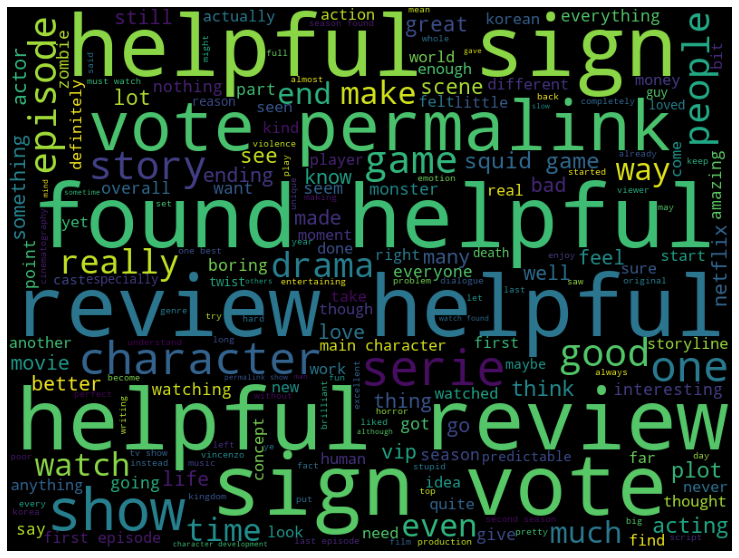

In [ ]:
# 전체 wordcloud

displayWordCloud(" ".join(clean_reviews))

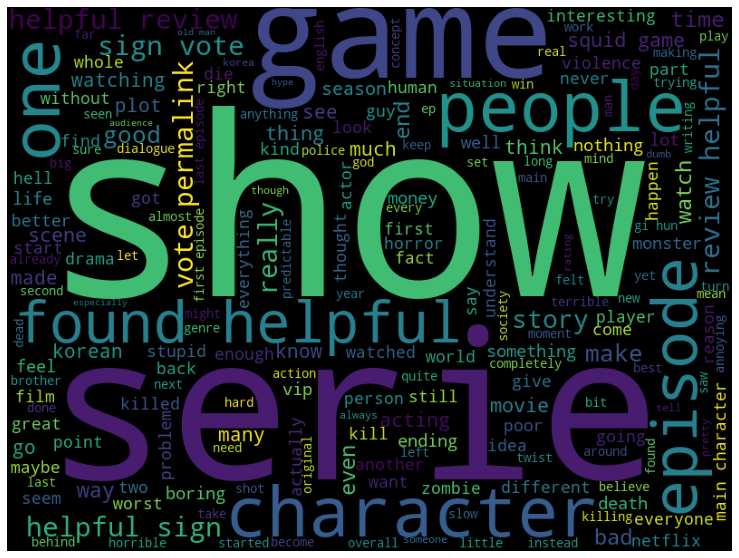

In [ ]:
# clean_reviews_NEGATIVE wordcloud

displayWordCloud(" ".join(df[df.sentiment_type == 'NEGATIVE'].clean_reviews))

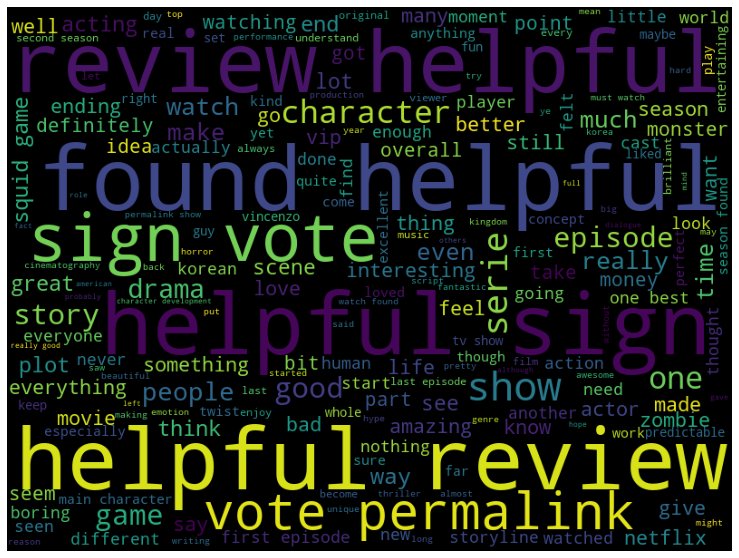

In [ ]:
# clean_reviews_POSITIVE wordcloud

displayWordCloud(" ".join(df[df.sentiment_type == 'POSITIVE'].clean_reviews))

### 단어 개수, 분포 관련 확인하기

In [ ]:
# 리뷰별 단어 개수 / 중복 제거한 unique 단어 개수 컬럼 생성

df["num_words"] = clean_reviews.apply(lambda x : len(str(x).split()))
df["num_uniq_words"] = clean_reviews.apply(lambda x: len(set(str(x).split())))

In [ ]:
# 첫번째 리뷰 단어 수 확인

x = clean_reviews[0]
x = str(x).split()
print(len(x))
x[:10]

140


['show',
 'primarily',
 'scathing',
 'indictment',
 'institutional',
 'bullying',
 'take',
 'place',
 'compulsory',
 'military']

리뷰별 단어 평균 값:  51.73727459484136
리뷰별 단어 중간 값:  35.0
리뷰별 고유 단어 평균 값:  43.72357909153161
리뷰별 고유 단어 중간 값:  31.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '리뷰별 고유 단어 수 분포')

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48624 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45800 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50612 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/bac

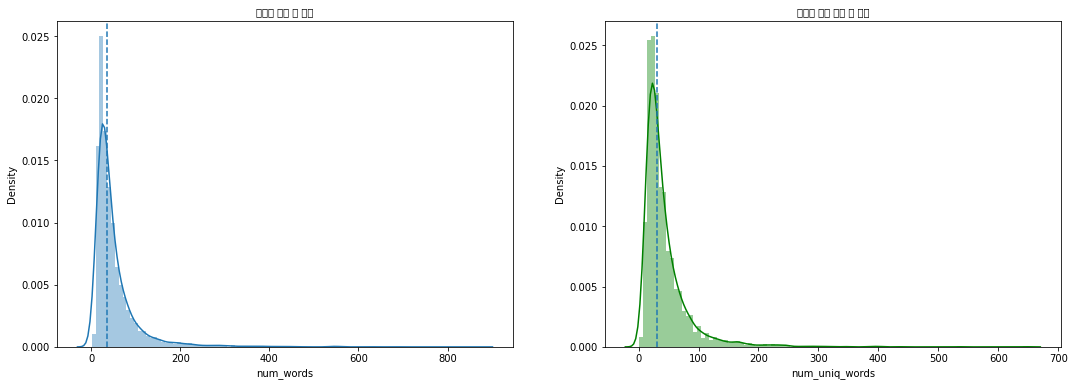

In [ ]:
# 리뷰별 고유 단어 수 분포

import seaborn as sns

fig, ax = plt.subplots(ncols = 2, figsize = (18, 6))
print("리뷰별 단어 평균 값: ", df["num_words"].mean())
print("리뷰별 단어 중간 값: ", df["num_words"].median())
sns.distplot(df["num_words"], bins = 100, ax = ax[0])
ax[0].axvline(df["num_words"].median(), linestyle = "dashed")
ax[0].set_title("리뷰별 단어 수 분포", fontproperties = "NanumBarunGothic")

print("리뷰별 고유 단어 평균 값: ", df["num_uniq_words"].mean())
print("리뷰별 고유 단어 중간 값: ", df["num_uniq_words"].median())
sns.distplot(df["num_uniq_words"], bins = 100, color = "g", ax = ax[1])
ax[1].axvline(df["num_uniq_words"].median(), linestyle = "dashed")
ax[1].set_title("리뷰별 고유 단어 수 분포", fontproperties = "NanumBarunGothic")

In [ ]:
from collections import Counter

# Counter 객체는 리스트요소의 값과 요소의 갯수를 카운트 하여 저장하고 있습니다.
# 카운터 객체는 .update 메소드로 계속 업데이트 가능합니다.
word_counts = Counter()

# 토큰화된 각 리뷰 리스트를 카운터 객체에 업데이트 합니다. 
df['tokens'].apply(lambda x: word_counts.update(x))

# 가장 많이 존재하는 단어 순으로 10개를 나열합니다
word_counts.most_common(10)

[('helpful', 6760),
 ('review', 3672),
 ('show', 3600),
 ('found', 3589),
 ('vote', 3419),
 ('sign', 3399),
 ('permalink', 3380),
 ('series', 2590),
 ('game', 2379),
 ('episode', 2144)]

In [ ]:
def word_count(docs):
    """ 토큰화된 문서들을 입력받아 토큰을 카운트 하고 관련된 속성을 가진 데이터프레임을 리턴합니다.
    Args:
        docs (series or list): 토큰화된 문서가 들어있는 list
    Returns:
        list: Dataframe
    """
    # 전체 코퍼스에서 단어 빈도 카운트
    word_counts = Counter()

    # 단어가 존재하는 문서의 빈도 카운트, 단어가 한 번 이상 존재하면 +1
    word_in_docs = Counter()

    # 전체 문서의 갯수
    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        word_in_docs.update(set(doc))

    temp = zip(word_counts.keys(), word_counts.values())

    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    # 단어의 순위
    # method='first': 같은 값의 경우 먼저나온 요소를 우선
    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    # 코퍼스 내 단어의 비율
    wc['percent'] = wc['count'].apply(lambda x: x / total)

    wc = wc.sort_values(by='rank')

    # 누적 비율
    # cumsum() : cumulative sum
    wc['cul_percent'] = wc['percent'].cumsum()

    temp2 = zip(word_in_docs.keys(), word_in_docs.values())
    ac = pd.DataFrame(temp2, columns=['word', 'word_in_docs'])
    wc = ac.merge(wc, on='word')
    
    # 전체 문서 중 존재하는 비율
    wc['word_in_docs_percent'] = wc['word_in_docs'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')

In [ ]:
wc = word_count(df['tokens'])
wc.head()

word  word_in_docs  count  ...   percent  cul_percent  word_in_docs_percent
236  helpful          3380   6760  ...  0.029824     0.029824              0.771513
194   review          3477   3672  ...  0.016200     0.046025              0.793654
20      show          1709   3600  ...  0.015883     0.061907              0.390094
231    found          3474   3589  ...  0.015834     0.077742              0.792970
239     vote          3400   3419  ...  0.015084     0.092826              0.776079

[5 rows x 7 columns]

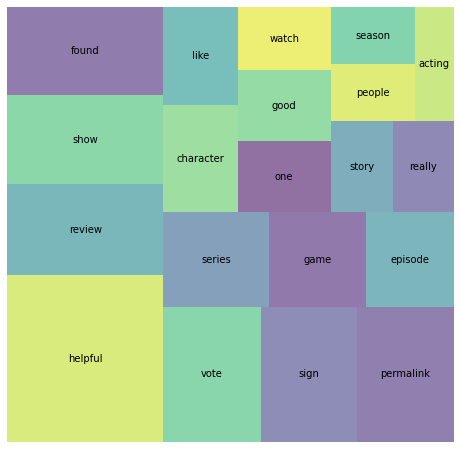

In [ ]:
import squarify
import matplotlib.pyplot as plt

fig, axes = plt.subplots(figsize=(8, 8))
wc_top20 = wc[wc['rank'] <= 20]
squarify.plot(sizes=wc_top20['percent'], label=wc_top20['word'], alpha=0.6)
plt.axis('off')
plt.show()

#**4. 변수 선택 및 모델 구축**

# Feature Engineering & Initial Modeling
---

In [ ]:
df1 = df.copy()
df1.drop(['scores', 'compound', 'num_words', 'num_uniq_words'], axis=1, inplace=True)
df1.head()

Movie Name  ... sentiment_type
0        D.P  ...       NEGATIVE
1        D.P  ...       POSITIVE
2        D.P  ...       NEGATIVE
3        D.P  ...       POSITIVE
4        D.P  ...       NEGATIVE

[5 rows x 5 columns]

## BoW벡터 생성

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
bow_vect = vect.fit_transform(df1['clean_reviews'].tolist())
word_list = vect.get_feature_names()
count_list = bow_vect.toarray().sum(axis=0)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# 단어 리스트
word_list

['aa',
 'aaaauuuughhhh',
 'aap',
 'aarrgh',
 'aatmanirbhar',
 'ab',
 'aback',
 'abandon',
 'abandoned',
 'abandoning',
 'abbandoned',
 'abc',
 'abd',
 'abdul',
 'abi',
 'abide',
 'abided',
 'ability',
 'abilty',
 'abit',
 'able',
 'ably',
 'abnormal',
 'abnormally',
 'abode',
 'abolish',
 'abomination',
 'abonnement',
 'abort',
 'abosolutely',
 'abot',
 'abound',
 'abounds',
 'abour',
 'abouth',
 'aboutthe',
 'abraham',
 'abrahamic',
 'abrasive',
 'abroad',
 'abrupt',
 'abruptly',
 'absence',
 'absent',
 'absentee',
 'absolute',
 'absolutely',
 'absolutly',
 'absorb',
 'absorbed',
 'absorbing',
 'abstain',
 'abstinence',
 'abstract',
 'absurd',
 'absurdely',
 'absurdist',
 'absurdity',
 'absurdly',
 'abt',
 'abundance',
 'abundantly',
 'abuse',
 'abused',
 'abuser',
 'abusing',
 'abusive',
 'abvouisly',
 'abysmal',
 'abysmally',
 'abyss',
 'academy',
 'accent',
 'accept',
 'acceptable',
 'acceptance',
 'accepted',
 'accepting',
 'accepts',
 'access',
 'accessible',
 'accident',
 'accid

In [ ]:
# 각 단어가 전체 리뷰중에 등장한 총 횟수
count_list

array([2, 1, 1, ..., 1, 1, 1])

In [ ]:
# 각 단어의 리뷰별 등장 횟수
bow_vect.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
bow_vect.shape

(4381, 13227)

In [ ]:
# 단어 - 총 등장 횟수 matching
word_count_dict = dict(zip(word_list, count_list))
word_count_dict

{'aa': 2,
 'aaaauuuughhhh': 1,
 'aap': 1,
 'aarrgh': 1,
 'aatmanirbhar': 1,
 'ab': 1,
 'aback': 1,
 'abandon': 5,
 'abandoned': 1,
 'abandoning': 1,
 'abbandoned': 1,
 'abc': 1,
 'abd': 1,
 'abdul': 11,
 'abi': 1,
 'abide': 1,
 'abided': 1,
 'ability': 16,
 'abilty': 1,
 'abit': 1,
 'able': 86,
 'ably': 4,
 'abnormal': 2,
 'abnormally': 1,
 'abode': 1,
 'abolish': 1,
 'abomination': 1,
 'abonnement': 1,
 'abort': 1,
 'abosolutely': 1,
 'abot': 1,
 'abound': 2,
 'abounds': 1,
 'abour': 1,
 'abouth': 1,
 'aboutthe': 1,
 'abraham': 1,
 'abrahamic': 1,
 'abrasive': 1,
 'abroad': 1,
 'abrupt': 2,
 'abruptly': 5,
 'absence': 3,
 'absent': 1,
 'absentee': 1,
 'absolute': 49,
 'absolutely': 201,
 'absolutly': 1,
 'absorb': 1,
 'absorbed': 3,
 'absorbing': 6,
 'abstain': 1,
 'abstinence': 1,
 'abstract': 3,
 'absurd': 13,
 'absurdely': 1,
 'absurdist': 1,
 'absurdity': 3,
 'absurdly': 1,
 'abt': 4,
 'abundance': 5,
 'abundantly': 1,
 'abuse': 14,
 'abused': 2,
 'abuser': 1,
 'abusing': 4,
 'abu

## TF-IDF 변환

In [ ]:
# 모듈에서 사용할 라이브러리와 spacy 모델을 불러옵니다.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

import spacy
nlp = spacy.load("en_core_web_sm")

In [ ]:
tfidf_vect = TfidfVectorizer(stop_words='english', max_features=5000)

# Fit 후 dtm을 만듭니다.(문서, 단어마다 tf-idf 값을 계산합니다)
dtm_tfidf = tfidf_vect.fit_transform(df1['clean_reviews'])

dtm_tfidf = pd.DataFrame(dtm_tfidf.todense(), columns=tfidf_vect.get_feature_names())
dtm_tfidf

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


abandon  abdul  ability      able  ably  ...   yr   yu  zero  zombie  zone
0         0.0    0.0      0.0  0.000000   0.0  ...  0.0  0.0   0.0     0.0   0.0
1         0.0    0.0      0.0  0.000000   0.0  ...  0.0  0.0   0.0     0.0   0.0
2         0.0    0.0      0.0  0.000000   0.0  ...  0.0  0.0   0.0     0.0   0.0
3         0.0    0.0      0.0  0.000000   0.0  ...  0.0  0.0   0.0     0.0   0.0
4         0.0    0.0      0.0  0.000000   0.0  ...  0.0  0.0   0.0     0.0   0.0
...       ...    ...      ...       ...   ...  ...  ...  ...   ...     ...   ...
4376      0.0    0.0      0.0  0.000000   0.0  ...  0.0  0.0   0.0     0.0   0.0
4377      0.0    0.0      0.0  0.000000   0.0  ...  0.0  0.0   0.0     0.0   0.0
4378      0.0    0.0      0.0  0.000000   0.0  ...  0.0  0.0   0.0     0.0   0.0
4379      0.0    0.0      0.0  0.000000   0.0  ...  0.0  0.0   0.0     0.0   0.0
4380      0.0    0.0      0.0  0.132275   0.0  ...  0.0  0.0   0.0     0.0   0.0

[4381 rows x 5000 columns]

#**5. 모델 학습 및 검증**

# Model Tuning & Evaluation
---

## 감성분류 - Logistic Regression

In [ ]:
# target 변수 변환
df1.sentiment_type.replace("POSITIVE" , 1 , inplace = True)
df1.sentiment_type.replace("NEUTRAL" , 0 , inplace = True)
df1.sentiment_type.replace("NEGATIVE" , 0 , inplace = True)

df1.head()

Movie Name  ... sentiment_type
0        D.P  ...              0
1        D.P  ...              1
2        D.P  ...              0
3        D.P  ...              1
4        D.P  ...              0

[5 rows x 5 columns]

In [ ]:
df1['sentiment_type'].value_counts()

1    3776
0     605
Name: sentiment_type, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

features = dtm_tfidf
target = df1['sentiment_type']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state=10)
print(f'X_train : {X_train.shape}  //  X_test : {X_test.shape}\ny_train : {y_train.shape}  //  y_test : {y_test.shape}')


#모델링
def modeling(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    metrics(y_test,pred)

#평가 지표
def metrics(y_test,pred):
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    roc_score = roc_auc_score(y_test,pred,average='macro')
    print('정확도 : {0:.2f}, \n정밀도 : {1:.2f}, \n재현율 : {2:.2f}'.format(accuracy,precision,recall))
    print('f1-score : {0:.2f}, \nauc : {1:.2f}'.format(f1,roc_score,recall)) 

X_train : (3066, 5000)  //  X_test : (1315, 5000)
y_train : (3066,)  //  y_test : (1315,)


In [ ]:
lr = LogisticRegression()
modeling(lr,X_train,X_test,y_train,y_test)

정확도 : 0.86, 
정밀도 : 0.86, 
재현율 : 1.00
f1-score : 0.92, 
auc : 0.52


## 데이터 업샘플링


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit_transform(X_train)
X_train = scaler.fit_transform(X_train)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_over,y_train_over = smote.fit_resample(X_train,y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, X_test.shape, y_train_over.shape, y_test.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (3066, 5000) (3066,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (5314, 5000) (1315, 5000) (5314,) (1315,)
SMOTE 적용 후 레이블 값 분포: 
 1    2657
0    2657
Name: sentiment_type, dtype: int64


In [ ]:
lr = LogisticRegression()
modeling(lr,X_train_over,X_test,y_train_over,y_test)

정확도 : 0.67, 
정밀도 : 0.99, 
재현율 : 0.62
f1-score : 0.76, 
auc : 0.79


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


## 감성분류 - LSTM

In [ ]:
# 토큰화
from tensorflow.keras.preprocessing.text import Tokenizer
import os
import pickle

tokenizer_name = 'keras_naver_review_tokenizer.pickle'
save_path = os.path.join(os.getcwd(), tokenizer_name)

max_words = 5000
tokenizer = Tokenizer(num_words=max_words, oov_token = True)
tokenizer.fit_on_texts(df1.tokens)
df1.tokens = tokenizer.texts_to_sequences(df1.tokens)


with open(save_path, 'wb') as f:
    pickle.dump(tokenizer, f, protocol=pickle.HIGHEST_PROTOCOL)

df1.head()

Movie Name  ... sentiment_type
0        D.P  ...              0
1        D.P  ...              1
2        D.P  ...              0
3        D.P  ...              1
4        D.P  ...              0

[5 rows x 5 columns]

In [ ]:
# 데이터 나누기
from sklearn.model_selection import train_test_split

features = df1['tokens']
target = df1['sentiment_type']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state=10)
print(f'X_train : {X_train.shape}  //  X_test : {X_test.shape}\ny_train : {y_train.shape}  //  y_test : {y_test.shape}')

X_train : (3066,)  //  X_test : (1315,)
y_train : (3066,)  //  y_test : (1315,)


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len=2000
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)

X_train shape:  (3066, 2000)
X_test shape:  (1315, 2000)


In [ ]:
# Encoding
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
# Train
batch_size = y_train.shape[0]
input_dim = 1
y_train = encoder.fit_transform(y_train) # Labeling
y_train = np.reshape(y_train, (batch_size, input_dim)) # Reshape
# Test
batch_size = y_test.shape[0]
y_test = encoder.transform(y_test) # Labeling
y_test = np.reshape(y_test, (batch_size, input_dim)) # Reshape

print(y_train.shape)
print(y_test.shape)

(3066, 1)
(1315, 1)


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM

model = Sequential()
model.add(Embedding(max_words, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
hist = model.fit(X_train, y_train, batch_size=32, epochs=5)

Epoch 1/5
96/96 [==============================] - 619s 6s/step - loss: 0.3821 - accuracy: 0.8653
Epoch 2/5
96/96 [==============================] - 620s 6s/step - loss: 0.2648 - accuracy: 0.9022
Epoch 3/5
96/96 [==============================] - 617s 6s/step - loss: 0.1360 - accuracy: 0.9442
Epoch 4/5
96/96 [==============================] - 617s 6s/step - loss: 0.0729 - accuracy: 0.9736
Epoch 5/5
96/96 [==============================] - 618s 6s/step - loss: 0.0428 - accuracy: 0.9889


In [ ]:
loss, acc = model.evaluate(X_test, y_test, batch_size=32)

print('Test loss:', loss)
print('Test accuracy:', acc)

42/42 [==============================] - 28s 645ms/step - loss: 0.5178 - accuracy: 0.8692
Test loss: 0.5178404450416565
Test accuracy: 0.8692015409469604


## 감성분류 - GRU

In [ ]:
!pip install pyyaml h5py

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import GRU
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model

# GRU모델 설계
model_GRU = Sequential()
model_GRU.add(Embedding(max_words, 128))
model_GRU.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
model_GRU.add(Dense(1, activation='sigmoid'))
model_GRU.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])

In [ ]:
# GRU 모델 검증
checkpoint_filepath = "GRU_medel.h5"
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
Mycallback = tf.keras.callbacks.ModelCheckpoint(
    filepath = checkpoint_filepath, 
    monitor='val_acc', 
    mode='max', 
    verbose=1, 
    save_best_only=True)

In [ ]:
# GRU 모델 훈련
hist_GRU = model_GRU.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[Mycallback])

Epoch 1/10
77/77 [==============================] - ETA: 0s - loss: 0.3804 - acc: 0.8548
Epoch 00001: val_acc improved from -inf to 0.89251, saving model to GRU_medel.h5
77/77 [==============================] - 503s 6s/step - loss: 0.3804 - acc: 0.8548 - val_loss: 0.3286 - val_acc: 0.8925
Epoch 2/10
77/77 [==============================] - ETA: 0s - loss: 0.3272 - acc: 0.8797
Epoch 00002: val_acc improved from 0.89251 to 0.90065, saving model to GRU_medel.h5
77/77 [==============================] - 518s 7s/step - loss: 0.3272 - acc: 0.8797 - val_loss: 0.2827 - val_acc: 0.9007
Epoch 3/10
77/77 [==============================] - ETA: 0s - loss: 0.2240 - acc: 0.9144
Epoch 00003: val_acc did not improve from 0.90065
77/77 [==============================] - 495s 6s/step - loss: 0.2240 - acc: 0.9144 - val_loss: 0.2814 - val_acc: 0.8958
Epoch 4/10
77/77 [==============================] - ETA: 0s - loss: 0.1479 - acc: 0.9490
Epoch 00004: val_acc did not improve from 0.90065
77/77 [============

In [ ]:
loaded_model = load_model(checkpoint_filepath)
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

42/42 [==============================] - 23s 533ms/step - loss: 0.3179 - acc: 0.8700

 테스트 정확도: 0.8700


## 임의의 리뷰 긍정/부정 예측

In [ ]:
from tensorflow.keras.datasets import imdb
word_to_index = imdb.get_word_index()

def sentiment_predict(new_sentence):
  new_sentence = re.sub('[^0-9a-zA-Z]', '', new_sentence).lower()

  # 정수 인코딩
  encoded = []
  for word in new_sentence.split():
    # 단어 집합의 크기를 10,000으로 제한
    try:
      if word_to_index[word] <= 10000:
        encoded.append(word_to_index[word]+3)
      else:
        # 10,000 이상의 숫자는 <unk> 토큰으로 취급
        encoded.append(2)
        # 단어 집합에 없는 단어는 <unk> 토큰으로 취급
    except KeyError:
      encoded.append(2)

  pad_new = pad_sequences([encoded], maxlen=max_len) # 패딩
  score = float(loaded_model.predict(pad_new)) # 예측
  if(score > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.".format(score * 100))
  else:
    print("{:.2f}% 확률로 부정 리뷰입니다.".format((1 - score) * 100))

  

In [ ]:
# 확인
# '싸이코지만 괜찮아' 10점 리뷰

test_pos = "So many things about this series are exceptionally good. The journey of healing and learning of each of the characters from the main leads to the various patients is very moving. Admirably tasteful way to deal with mental and emotional issues on screen. The central love story is so involving because their pain feels profound. The incomparable Seo Ye Ji as writer Ko Moon-young is unforgettable - strong and vulnerable, finally a real step forward for K drama heroines. Enjoy each sentence she utters in her signature low voice. She has some memorable and often hilarious dialogue. A far cry from the Cinderella type heroines of early melodramas. And her outfits are stunning - perfectly suited to her tiny waist. Kim Soo-hyun is well cast as caregiver Moon Gang-tae. He isn't a larger than life hero but instead a man with pain and burdens. He looks more mature here. The pairing of the two leads is right. Much better than The King Eternal Monarch where there was little chemistry between Lee Min Ho and Kim Go Eun. Oh Jung-se gives a likable convincing performance as autistic Moon Sang-tae, In less capable hands the character could have been annoying or tiresome but he made the brotherly relationship very touching. The production values are very high. From the well integrated animation of the stories to the quirky Tim Burton style house, it all has a high quality feature film standard feel to it. To cap it all off the ending is a good and satisfying one. For all those who have been disappointed by unsatisfying endings in K dramas this one helps to makes up for some of them. A must watch."

sentiment_predict(test_pos)

68.38% 확률로 긍정 리뷰입니다.


In [ ]:
# 확인
# '사랑의 불시착' 1점 리뷰

test_neg = "this movie was just way too overrated"

sentiment_predict(test_neg)

68.38% 확률로 긍정 리뷰입니다.
